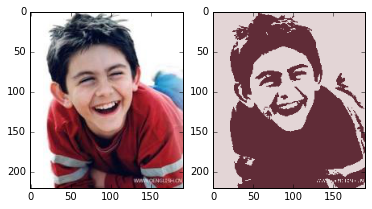

In [128]:
# -*- coding: utf-8 -*-
from PIL import Image
from pylab import *
import numpy as np
import time
%matplotlib inline
#import matplotlib.pyplot as plt
"""
kmeans 进行图片的像素聚类，可以进行图片压缩
"""
def kmeans(X,k):
    """
    numpy  kmeans
    """
    X=np.float64(X)   #转化为浮点数
    XMat=np.mat(X)  #转化为mat视图
    n=X.shape[0]     #样本数
    # 计算初始点
    each=n/k    
    mu=np.empty((k,XMat.shape[1]))
    muMat=np.mat(mu)
    for i in range(k):
        # 一开始  each 写成了 k 造成bug
        muMat[i,:]=np.sum(XMat[i*each:(i+1)*each,:],axis=0)/each
    #print u'初始中心',muMat
    MAX_ITR=1000
    #类别数组 r_nk[i] = j 样本i 属于 类别 j
    r_nk=np.empty(n)
    pre_r_nk=np.zeros(n)
    
    for _ in range(MAX_ITR):
        # E 步
        tmp=np.empty((n,k))
        for i in range(k):
            tmp[:,i]=np.sum(np.multiply((XMat-muMat[i,:]),(XMat-muMat[i,:])),axis=1).T
        #print u'距离数组',tmp
        r_nk=argmin(tmp,axis=1)
        err=np.sum(np.min(tmp,axis=1))
        #print u'误差',err      #误差
        #print u'类别',r_nk  #打印类别数组
        if (r_nk==pre_r_nk).all():
            break
        pre_r_nk=r_nk
        # M 步
        for i in range(k):
            muMat[i,:]=np.sum(XMat[r_nk==i,:],axis=0)/np.sum(r_nk==i)
            
    # 画图部分 仅适合二维
    #fig=plt.figure()
    #ax=fig.add_subplot(1,1,1)
    #ax.scatter(muMat[:,0],muMat[:,1],color='r')
    #ax.scatter(XMat[r_nk==0,0],XMat[r_nk==0,1],color='b')
    #ax.scatter(XMat[r_nk==1,0],XMat[r_nk==1,1],color='g')
    return  muMat,r_nk       
colors = ['r','b','g','#FF90DD']
def pic_compress(img_path,partitions):
    """
    对图像的像素点进行聚类,只考虑rgb不考虑空间位置
    """
    im = array(Image.open(img_path))
    figure()
    gray()
    subplot(1, 2, 1)
    imshow(im)
    h,w,b=im.shape
    #注意要复制
    im1=im.copy().reshape(h*w,b)
    mu,r_nk=kmeans(im1,partitions)
    for k in range(mu.shape[0]):
        im1[r_nk==k,:] = mu[k]
    im2=im1.reshape(h,w,b)
    subplot(1, 2, 2)
    imshow(im2)
    res=Image.fromarray(im2)
    res.save('boy'+unicode(partitions)+'.jpg')
    
#kmeans(np.array([[1,2],[1,1],[2,3],[10,10],[4,3],[6,10],[9,11]]),2)
pic_compress('boy.jpg',2)

In [102]:
a=np.arange(36).reshape((3,4,3))
print a
a.reshape(12,3).reshape((3,4,3))

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]

 [[24 25 26]
  [27 28 29]
  [30 31 32]
  [33 34 35]]]


array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]]])